<a href="https://colab.research.google.com/github/missahora/Google_Colabolatory-lecture-3A-computer_and/blob/main/%E8%AA%B2%E9%A1%8C83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

x_latent = np.linspace(-10, 10, 101)

In [107]:
f2 = lambda x: x ** 3+ 2* x **2 -6 * x + 4

In [90]:
def leastsquares(x_latent,x_observed,fx_observed):
  x_ones = np.ones(len(x_observed))
  d = 3
  x_tmp = x_ones
  X_tmp = [x_tmp]
  for i in range(d):
    x_tmp = x_observed * x_tmp
    X_tmp.append(x_tmp)

  X_tmp = np.matrix(X_tmp)
  X_tmp

  S = X_tmp * X_tmp.T

  T = X_tmp @ fx_observed.reshape(len(x_observed),1)
  coeff = np.linalg.solve(S,T)
  interpolated  = []
  for x in x_latent:
      a = float(coeff[3])
      b = float(coeff[2])
      c = float(coeff[1])
      d = float(coeff[0])
      y = a * x ** 3 + b * x ** 2 + c * x + d
      interpolated.append(y)
  return interpolated

In [94]:
def leastsquares(x_latent,x_observed,fx_observed,d = 3):
  x_ones = np.ones(len(x_observed))
  x_tmp = x_ones
  X_tmp = [x_tmp]
  for i in range(d):
    x_tmp = x_observed * x_tmp
    X_tmp.append(x_tmp)

  X_tmp = np.matrix(X_tmp)
  X_tmp

  S = X_tmp * X_tmp.T

  T = X_tmp @ fx_observed.reshape(len(x_observed),1)
  coeff = np.linalg.solve(S,T)
  interpolated  = []
  for x in x_latent:
    y = 0
    for i in range(d+1):
      y += float(coeff[i]) * x ** i
    interpolated.append(y)
  return interpolated

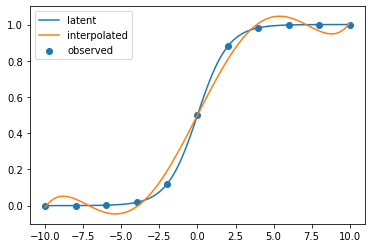

In [98]:
plt.scatter(x_observed, fx_observed.reshape(len(x_observed),1), label = "observed")
plt.plot(x_latent,f(x_latent),label = "latent")
plt.plot(x_latent,leastsquares(x_latent,x_observed,fx_observed,d = 5),label = "interpolated")
plt.legend()

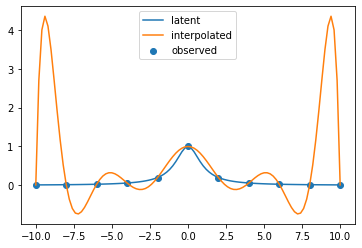

In [104]:
plt.scatter(x_observed, gx_observed.reshape(len(x_observed),1), label = "observed")
plt.plot(x_latent,g(x_latent),label = "latent")
plt.plot(x_latent,leastsquares(x_latent,x_observed,gx_observed, d = 10),label = "interpolated")
plt.legend()

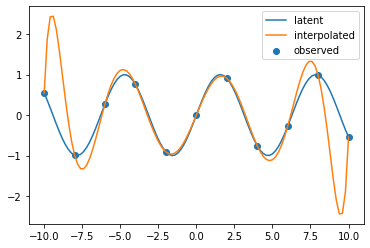

In [106]:
plt.scatter(x_observed, hx_observed.reshape(len(x_observed),1), label = "observed")
plt.plot(x_latent,h(x_latent),label = "latent")
plt.plot(x_latent,leastsquares(x_latent,x_observed,hx_observed,d = 9),label = "interpolated")
plt.legend()